# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [291]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
import warnings
warnings.filterwarnings('ignore')

In [292]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [293]:
# reading the dataset
bike_data=pd.read_csv('/content/drive/MyDrive/Machine Learning Regression project/SeoulBikeData.csv',encoding='unicode_escape')

In [294]:
# brief look at the dataset
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [165]:
bike_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [166]:
# Shape of the dataset
bike_data.shape

(8760, 14)

In [167]:
# information about the dataset
bike_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [168]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## **Changing column names into simple column names**

In [169]:
# all the column or feature
bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [295]:
#Rename the complex columns name
bike_data=bike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

## **Finding categorical features in our dataset.**

In [171]:
#To find out categorical features in our dataset
bike_data.dtypes

Date                      object
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

In [172]:
print(bike_data.dtypes.astype(str).value_counts())

float64    6
object     4
int64      4
dtype: int64


In [173]:
# see all the date or diffrent sesaons and holiday and functioning day
print(bike_data['Seasons'].unique())
print(bike_data['Holiday'].unique())
print(bike_data['Functioning_Day'].unique())
print(bike_data['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


## **Extracting features from date**

In [296]:
#extarcting all usefull from date formate
bike_data['Date']=pd.to_datetime(bike_data['Date'])
bike_data['Year'] = pd.DatetimeIndex(bike_data['Date']).year
bike_data['Day'] = pd.DatetimeIndex(bike_data['Date']).day
bike_data['Month']= pd.DatetimeIndex(bike_data['Date']).month
bike_data['weekday']=pd.DatetimeIndex(bike_data['Date']).weekday

In [175]:
# data after date time extraction
bike_data.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [176]:
display(bike_data['weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

In [177]:
#weekday is in range 0-6, so we need to make it to normal 1-7
bike_data['weekday'] = np.array(bike_data['weekday'])+1
display(bike_data['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

In [178]:
Rented_bike_per_Weekday= pd.DataFrame(bike_data['Rented_Bike_Count'].groupby(by=bike_data['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bike_per_Weekday

,weekday,Rented_Bike_Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [179]:
# read the data for the year
bike_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [180]:
# year month count from the data set
bike_data.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

,Year,Month,Rented_Bike_Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [297]:
bike_data['Months_string'] = bike_data['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [182]:
import plotly.express as px
#line plot for the month_year group
month_year_group= bike_data.groupby(by=['Month','Months_string','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented_Bike_Count',x= 'Months_string',color= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=1000)
#bar plot for diffrent year
px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=1000,height=1000)

As we can see, Rented bike count was very low in 2017.

In the year 2018, we can see a sharp increase in Rented bike count.

Highest Demand for rented bike is in midyear (may, june, july)

## **Checking distribution of our dependent variable**


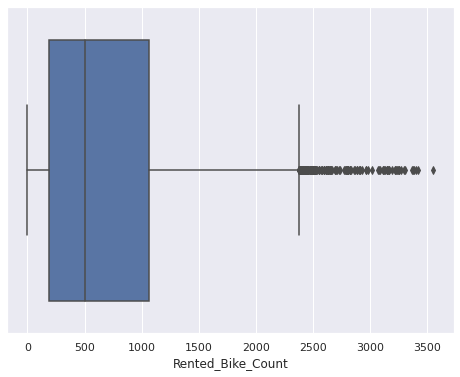

In [183]:
# histogram  plot for the rented bike and year
px.histogram(bike_data, x="Rented_Bike_Count",marginal="violin",color='Year')
sns.boxplot(x = bike_data['Rented_Bike_Count'])

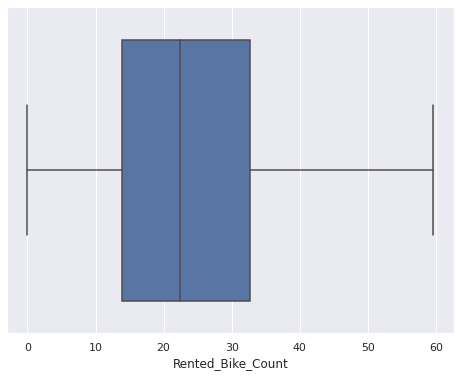

In [184]:
#square root transformation
px.histogram(bike_data, x=np.sqrt(bike_data["Rented_Bike_Count"]),color='Year',marginal="violin", title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')
sns.boxplot(x = np.sqrt(bike_data["Rented_Bike_Count"]))


**Our Model works best when we have normal distribution. Normal distribution for model building as it makes math easier. Models like LDA, Gaussian Naive Bayes, Logistic Regression, Linear Regression, etc., are explicitly calculated from the assumption that the distribution is a bivariate or multivariate normal**

#**Exploring Categorical variables**



In [185]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In our dataset, information about all months are given

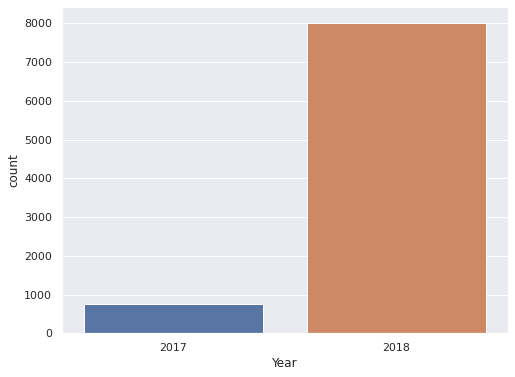

In [186]:
#countplot for year
sns.countplot(x ='Year', data = bike_data)

Our dataset mostly contains information of year 2018 and very little information of year 2017.

#**Finding relation between variables USING BAR PLOT**

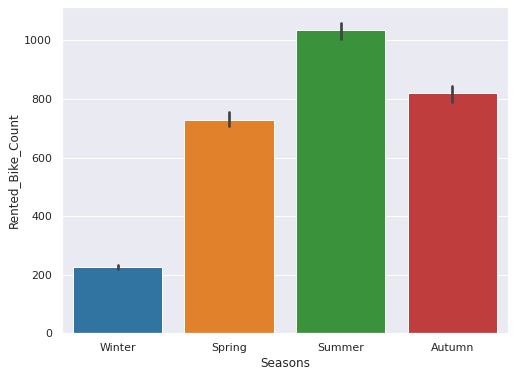

In [187]:
#Finding relation betwwen seasons and rented bike count. telling us rented bike count on that season.
# sns.set_style('darkgrid')
sns.barplot(x ='Seasons', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')

Rented bike count is less in winter and almost consistantly higher in other months

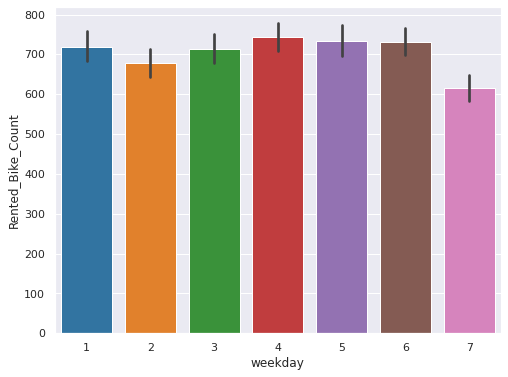

In [188]:
#plot for the rented bike forweekday
sns.barplot(x ='weekday', y ='Rented_Bike_Count', data = bike_data, palette ='tab10')

In all days, rented bike count is consistant and equal

## **Exploring Numerical Variables**

In [189]:
bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In [190]:
#selecting numerical features
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall' ]

In [191]:
# List of colors in the color palettes
rgb_values = sns.color_palette("bright")

In [192]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

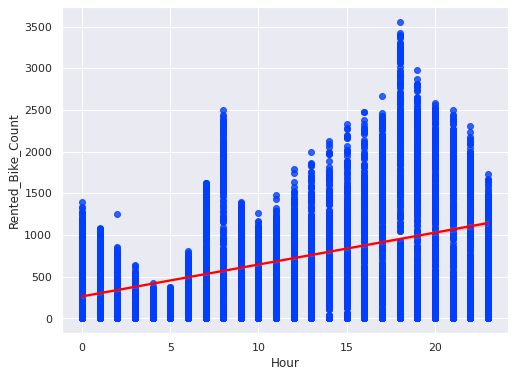

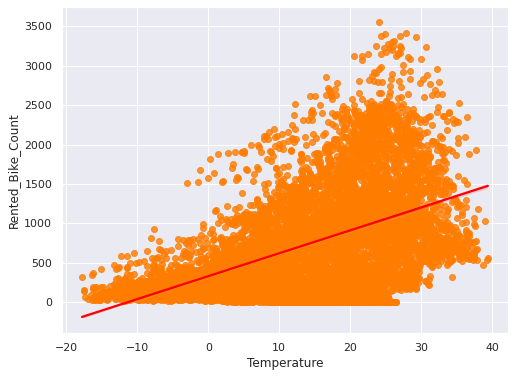

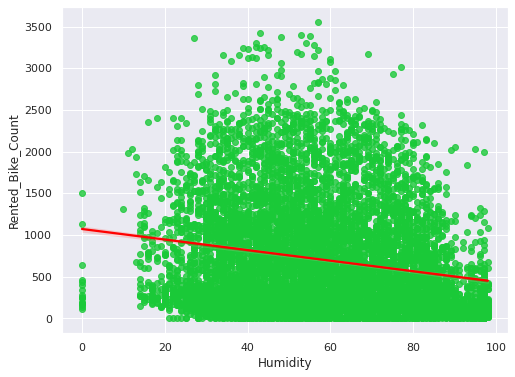

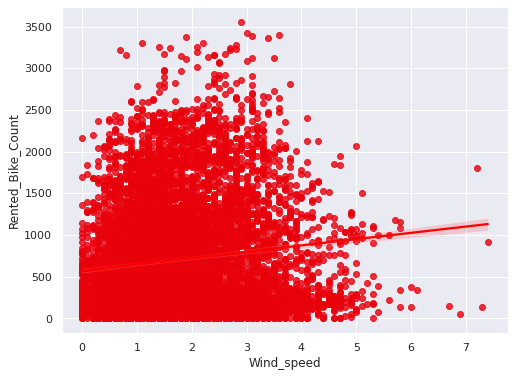

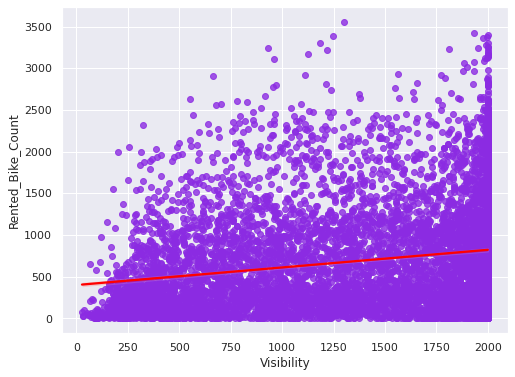

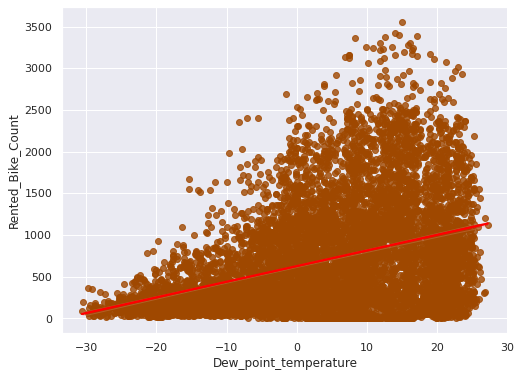

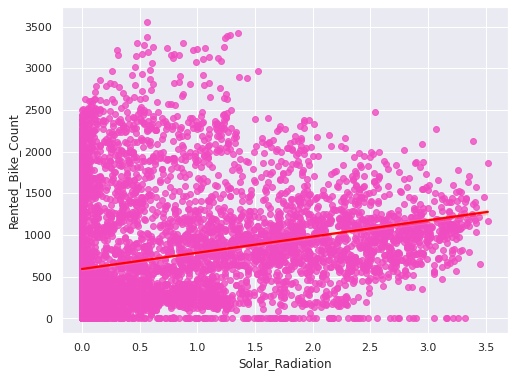

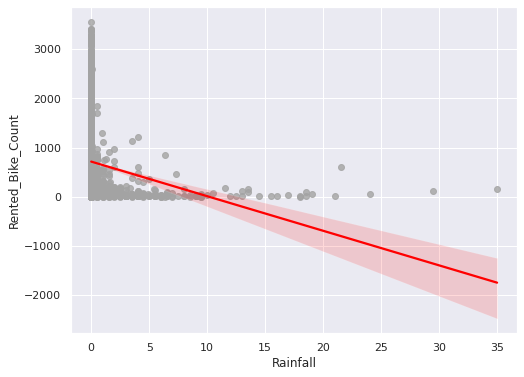

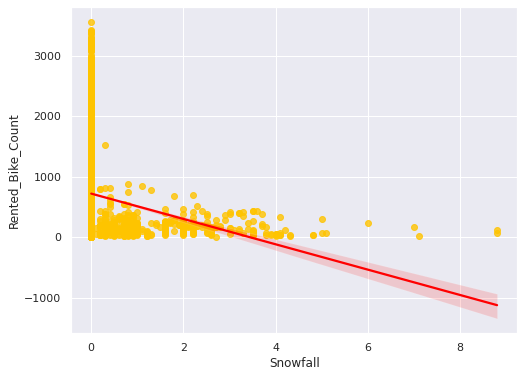

In [193]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bike_data[col], y = bike_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

# **Effects of Numerical features in rented bike count:-**
**Hour**: Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).

**Temperature** : Temperature is positively correlated. Rented bike count is highest between 20 °C and 30 °C. So, it means temperature has an effect.

**Humidity** : Humidity is the amount of water vapor in the air. So, People preferring to borrow bike When there is less humidity.

**Wind_speed** : wind speed doesn't affect our data much.

**Visibility**: Visibility doesn't affect our results much but all we know is that it is positively correlated with bike count.

**SnowFall and Rainfall**: People don't prefer borrowing bike, where there is rainfall or snowfall.

**Dew point**: The dew point is the temperature the air needs to be cooled to (at constant pressure) in order to achieve a relative humidity. It is positively correlated with data.

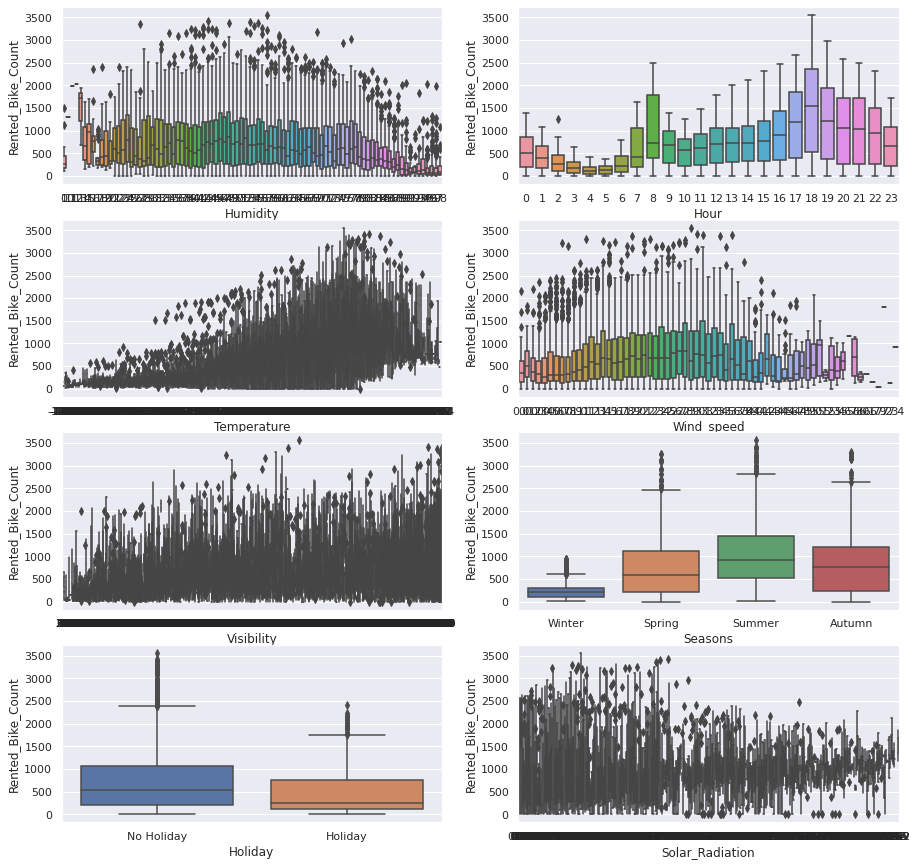

In [194]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=bike_data,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])

#**Finding Correlation of Dependent variable with other variables**

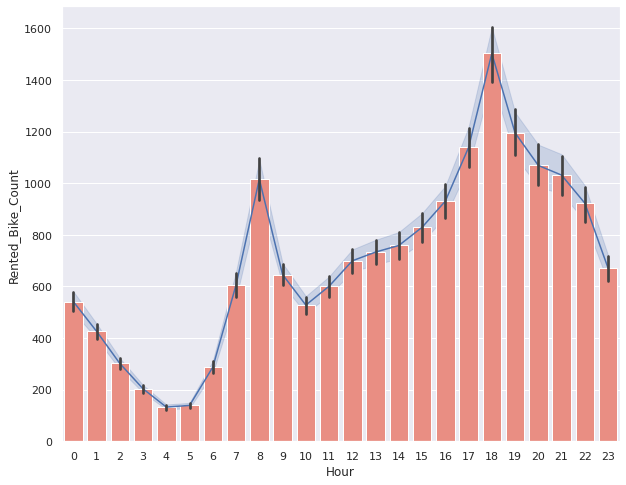

In [195]:
# bar plot between hr and rented bike count
plt.figure(figsize=(10,8))
sns.lineplot(x = bike_data['Hour'],y = bike_data['Rented_Bike_Count'])
sns.barplot(x = bike_data['Hour'],y = bike_data['Rented_Bike_Count'], color="salmon")

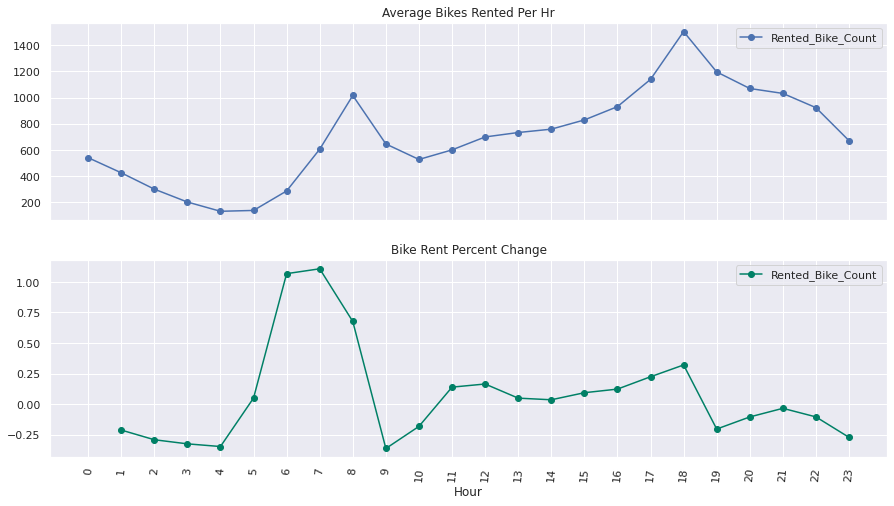

In [196]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bike_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))


Consumers are renting bikes more in specific hours of a day. In morning it is 7:00 to 9:00 and then in evening from 15:00 to 19:00.

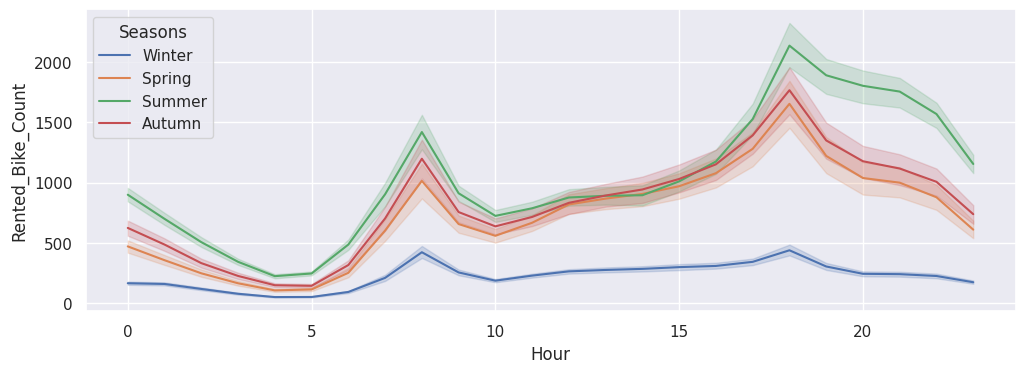

In [197]:
# line plot seasonal varaition
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=bike_data, x="Hour", y="Rented_Bike_Count", hue="Seasons")

There is an Amazing insight that consumers prefer borrowing bikes more in a particular season. Rented bike count is highest in summer and least in winter

## **Relational Analysis - Find correlation between different variables**

In [198]:
#correlation data
np.round(bike_data.corr()['Rented_Bike_Count'],3)

Rented_Bike_Count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Year                     0.215
Day                      0.047
Month                    0.071
weekday                 -0.022
Name: Rented_Bike_Count, dtype: float64

In [199]:
# dropping the non-perfoming column
bike_data.drop('Months_string',axis=1,inplace=True)
bike_data.drop('Date',axis=1,inplace=True)

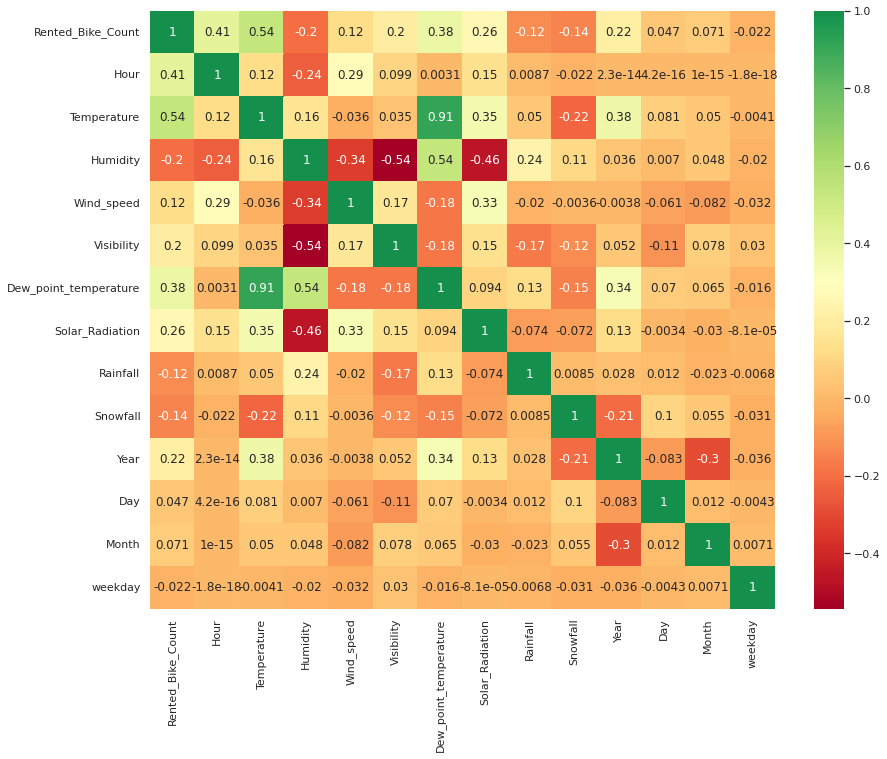

In [200]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = bike_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bike_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

Temperature and Dew point temperature are highly correlated. so we are dropping Dew point temperature column.


In [201]:
bike_data.drop('Dew_point_temperature',axis=1,inplace=True)

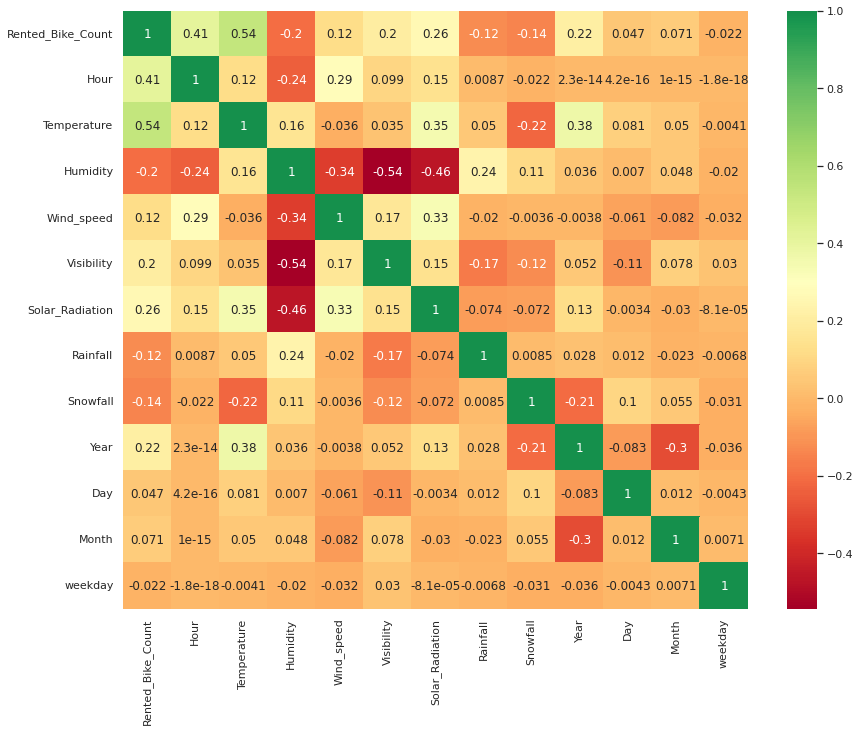

In [202]:
#correlation plot
corrmat = bike_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bike_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

In [203]:
#creating dummies column for the given feature
bike_data=pd.get_dummies(bike_data,drop_first=True)

In [204]:
# table after feature engineering
bike_data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,weekday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,1,4,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,1,4,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,1,4,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,1,4,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,1,4,0,0,1,1,1


In [205]:
# removing less importance column
bike_data.drop('weekday',axis=1,inplace=True)


In [206]:
bike_data.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,1,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,1,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,1,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,1,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,1,0,0,1,1,1


In [207]:
bike_data.shape

(8760, 17)

# **Model Building**

In [208]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

In [209]:
# Data for all the independent variables
X = bike_data.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable

y = np.sqrt(bike_data['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [210]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)


ExtraTreesRegressor()

In [211]:
print(model.feature_importances_)

[0.25466079 0.14575154 0.10706229 0.01435069 0.02727449 0.05684299
 0.03922694 0.00257148 0.00130321 0.01610104 0.01552419 0.01593301
 0.00765973 0.12965234 0.00515348 0.16093181]


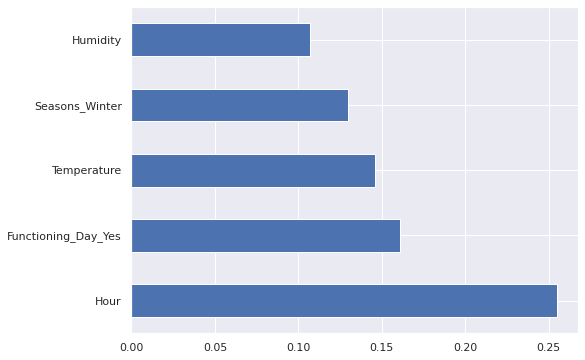

In [212]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## **Train Test Split for Model**


In [213]:
#import train-test split lib
from sklearn.model_selection import train_test_split
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


## **Linear Regression Model**

In [214]:
#importing linear regression model
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [215]:
# all coeffient
reg.score(X_train, y_train)

0.6530781682549911

In [216]:
#diffrent coefficient for different features
reg.coef_

array([ 4.87916776e-01,  4.71541482e-01, -1.67447263e-01,  1.77079208e-01,
       -1.17070996e-04, -8.86828659e-01, -1.42641886e+00,  1.24828675e-01,
       -2.65605857e+00, -1.88278450e-02, -2.41976083e-02, -2.94160558e+00,
       -2.67746236e+00, -9.16744335e+00,  2.82124668e+00,  2.84389626e+01])

In [217]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [218]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 53.2072431253937
RMSE : 7.294329518563972
R2 : 0.6530781682549911
Adjusted R2 : 0.6498788891149795


In [219]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.19887385773901
RMSE : 7.4295944611895886
R2 : 0.658156332691465
Adjusted R2 : 0.6550038838863143


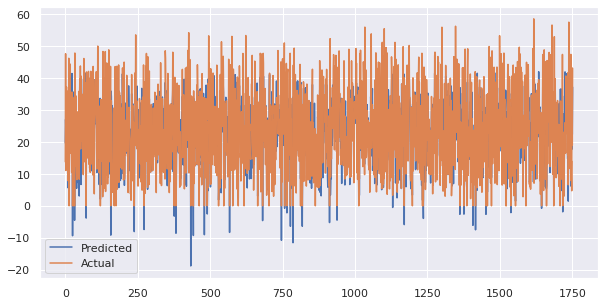

In [220]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

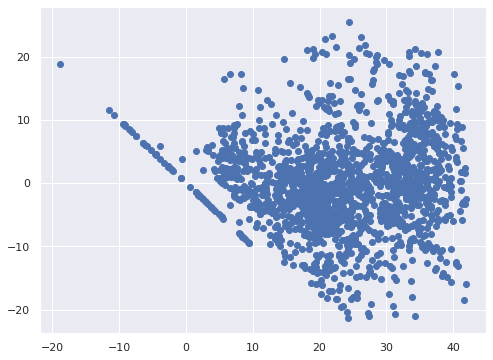

In [221]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

# **Implementing lasso Regression**

In [222]:
#importing lasso regression model
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [223]:
# lasso score 
lasso.score(X_train, y_train)

0.642083949746934

In [224]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [225]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.89342140419932
RMSE : 7.409009475240217
R2 : 0.642083949746934
Adjusted R2 : 0.6387832830010844


In [226]:
# mterics for lasso regressor flor test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.596458255830626
RMSE : 7.5892330479324865
R2 : 0.6433082210173451
Adjusted R2 : 0.6400188443811938


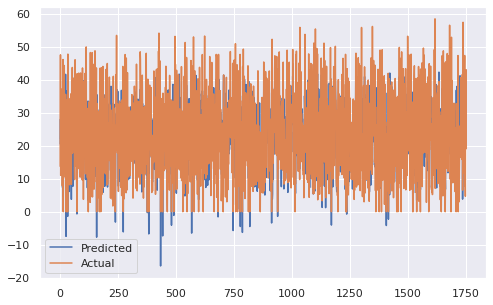

In [227]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

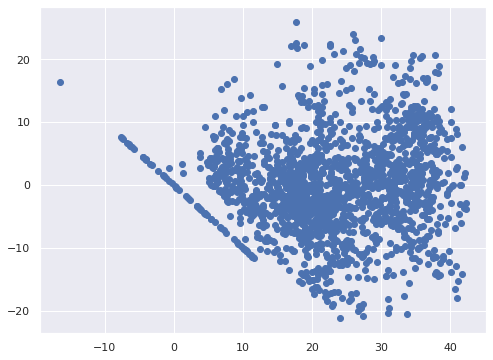

In [228]:
# Heteroscedasticity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

# **Implementing Ridge Regression**

In [229]:
#importing ridge regression
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [230]:
# ridge score
ridge.score(X_train, y_train)

0.6530781231528042

In [231]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [232]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 53.20725004269553
RMSE : 7.294329992720066
R2 : 0.6530781231528042
Adjusted R2 : 0.6498788435968648


In [233]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.19914200362329
RMSE : 7.429612506963152
R2 : 0.6581546720783755
Adjusted R2 : 0.6550022079592136


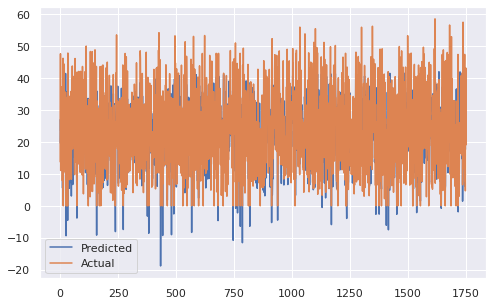

In [234]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

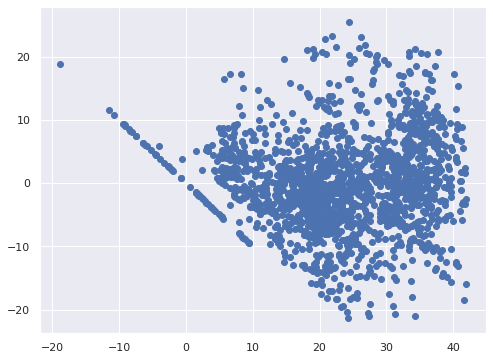

In [235]:
# Heteroscedasticity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **Implementing of decision tree by using decision tree regressor**

In [236]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [237]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [238]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.84178898662428
MSE : 24.26475097129125
RMSE : 4.925926407417315
R2 : 0.84178898662428
Adjusted R2 : 0.8403299801608728


In [239]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 30.22252393999043
RMSE : 5.497501608912037
R2 : 0.8128335290753791
Adjusted R2 : 0.81110749821959


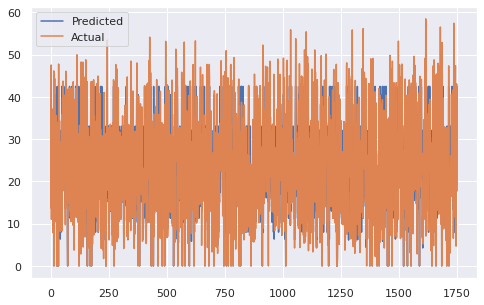

In [240]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

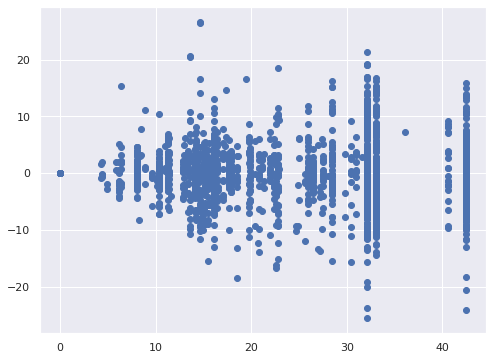

In [241]:
# Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

# **Implementing Random forest Rergressor**

In [242]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [243]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [244]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9871674461685886
MSE : 1.968122928998773
RMSE : 1.4028980465446421
R2 : 0.9871674461685886
Adjusted R2 : 0.9870491056145237


In [245]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.903916893691131
MSE : 15.514926184711467
RMSE : 3.9388991082168463
R2 : 0.903916893691131
Adjusted R2 : 0.9030308246992337


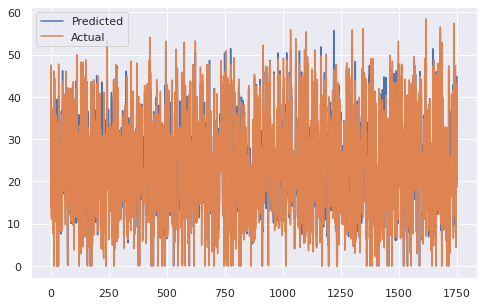

In [246]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

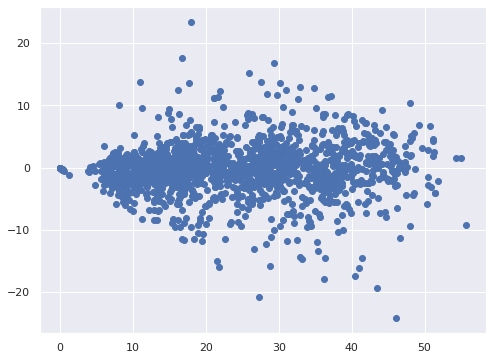

In [247]:
#Heteroscedasticity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [248]:
# random forest important feature selection
rf_model.feature_importances_

array([0.24444782, 0.280802  , 0.08552647, 0.01312603, 0.01414185,
       0.04206687, 0.07225529, 0.00151135, 0.00114954, 0.0129905 ,
       0.01062452, 0.0075252 , 0.00123198, 0.05147999, 0.00233288,
       0.15878771])

In [249]:
importance_rf=rf_model.feature_importances_
imortance_rf_dict={"Feature":list(X_train.columns),"Feature importance":importance_rf}
imortance_rf_df=pd.DataFrame(imortance_rf_dict)
imortance_rf_df["Feature importance"]=round(imortance_rf_df["Feature importance"],2)
imortance_rf_df.sort_values(by=["Feature importance"],ascending=False)

,Feature,Feature importance
1,Temperature,0.28
0,Hour,0.24
15,Functioning_Day_Yes,0.16
2,Humidity,0.09
6,Rainfall,0.07
13,Seasons_Winter,0.05
5,Solar_Radiation,0.04
3,Wind_speed,0.01
4,Visibility,0.01
9,Day,0.01


In [250]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

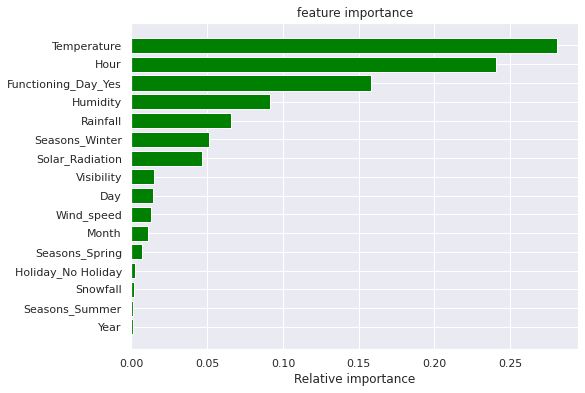

In [251]:
features=X_train.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)
plt.title("feature importance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()    

# **Training Random forest Regressor from GridesearchCV**

In [252]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,6,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

# **Importing Random forest Regressor**

In [253]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [254]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [255]:
rf_optimal_model = rf_grid.best_estimator_
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [256]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [257]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8619597523418423
MSE : 21.171169831812765
RMSE : 4.601213951971019
R2 : 0.8619597523418423
Adjusted R2 : 0.8606867587034962


In [258]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8619597523418423
MSE : 25.72846692232203
RMSE : 5.072323621607954
R2 : 0.8406649833179558
Adjusted R2 : 0.8391956114061906


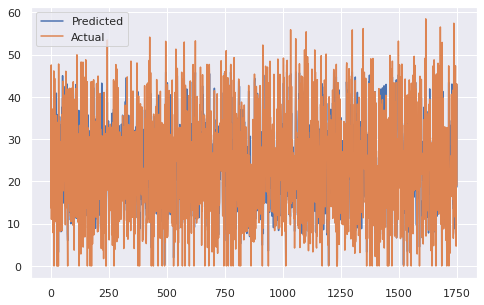

In [259]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_r_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

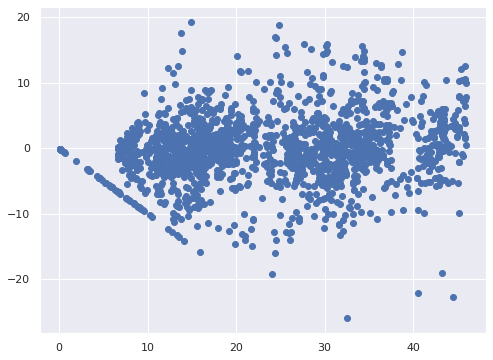

In [260]:
#Heteroscedasticity
plt.scatter((y_pred_test_r_g),(y_test)-(y_pred_test_r_g))

In [261]:
# for the important features
rf_optimal_model.feature_importances_

array([2.70306654e-01, 3.08662551e-01, 8.44958607e-02, 3.63386687e-04,
       2.17233432e-03, 3.44283997e-02, 7.12583772e-02, 4.64019211e-05,
       9.25299268e-04, 3.67935276e-03, 7.25807066e-03, 2.80322898e-03,
       4.74532808e-04, 6.06943283e-02, 3.80271767e-04, 1.52050950e-01])

In [262]:
#important feature selection
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)
#reading table of important features
imortance_rf_gddf.head()

,Feature,Feature importance
0,Hour,0.27
1,Temperature,0.31
2,Humidity,0.08
3,Wind_speed,0.00
4,Visibility,0.00


In [263]:
#featuer in ascending order
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

,Feature,Feature importance
1,Temperature,0.31
0,Hour,0.27
15,Functioning_Day_Yes,0.15
2,Humidity,0.08
6,Rainfall,0.07
13,Seasons_Winter,0.06
5,Solar_Radiation,0.03
10,Month,0.01
3,Wind_speed,0.00
4,Visibility,0.00


In [264]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

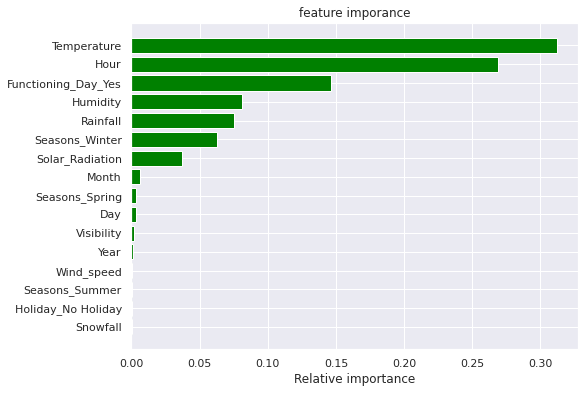

In [265]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)
#barh plot for important features 
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()  

# **Implementing Xgboost Regressor**

In [266]:
# Create an instance of the RandomForestRegressor
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[06:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [267]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [268]:
#xg boost on train data
print("Model Score:",xg_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8881798193956404
MSE : 17.149810105103573
RMSE : 4.141232920894884
R2 : 0.8881798193956404
Adjusted R2 : 0.8871486246465512


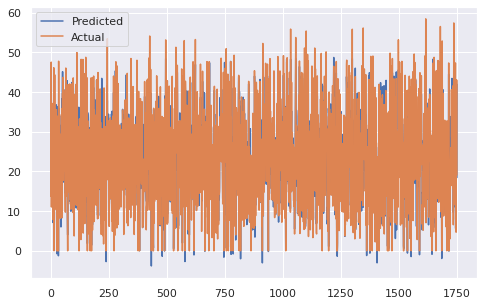

In [269]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_xg)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

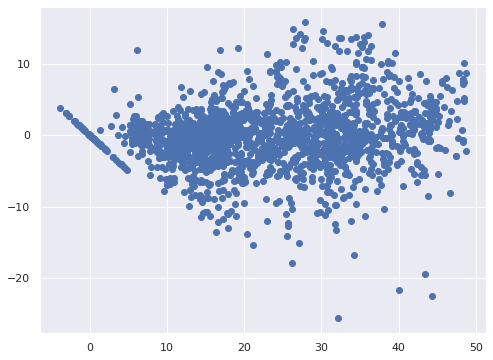

In [270]:
#Heteroscedasticity
plt.scatter((y_pred_test_xg),(y_test)-(y_pred_test_xg))

In [271]:
xg_model.feature_importances_

array([0.07632273, 0.1461394 , 0.09347811, 0.00196624, 0.0034548 ,
       0.0537785 , 0.1100102 , 0.00466184, 0.01501151, 0.0076224 ,
       0.01339414, 0.00605223, 0.00674429, 0.18987793, 0.01124176,
       0.2602439 ], dtype=float32)

In [272]:
importances = xg_model.feature_importances_

importance_dictxg = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxg = pd.DataFrame(importance_dictxg)
importance_dfxg['Feature Importance'] = round(importance_dfxg['Feature Importance'],2)
xg_model.fit(X_train,y_train)

[06:46:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

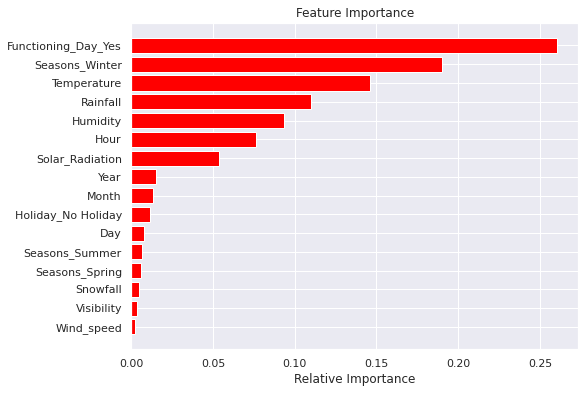

In [273]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Training Xgboost regressor with Gridsearch**
# **Provide the range for Hyperparameter**

In [274]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [275]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[06:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [276]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[06:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[06:46:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[06:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[06:46:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[06:46:02] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [277]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [278]:
xg_optimal_model = xg_grid.best_estimator_

In [279]:
xg_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [280]:
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(X_train)
y_pred_test_x_g  = xg_optimal_model.predict(X_test)

In [281]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9788474219089348
MSE : 3.244161255459456
RMSE : 1.801155533389456
R2 : 0.9788474219089348
Adjusted R2 : 0.9786523549063659


In [282]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9788474219089348
MSE : 13.813163797938946
RMSE : 3.7166064895195654
R2 : 0.914455816943104
Adjusted R2 : 0.9136669368688041


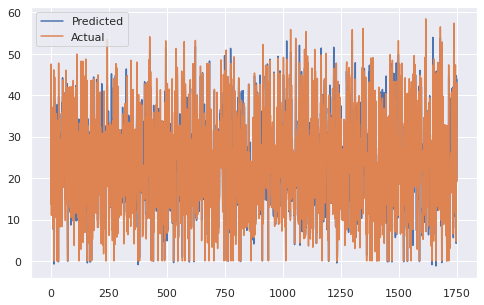

In [283]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_x_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

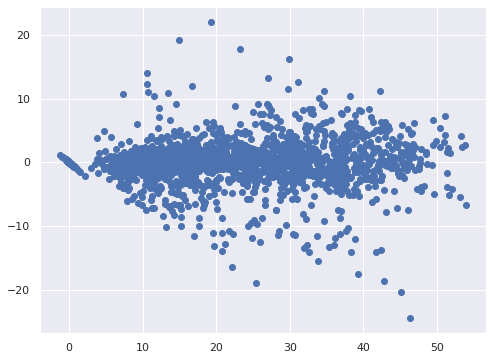

In [284]:
#Heteroscedasticity
plt.scatter((y_pred_test_x_g),(y_test)-(y_pred_test_x_g))

# **Features importance with XGBOOST training**

In [285]:
xg_optimal_model.feature_importances_

array([0.04182476, 0.04010208, 0.01545739, 0.00178683, 0.00275296,
       0.01843117, 0.0993922 , 0.00453455, 0.00536531, 0.00389147,
       0.00421298, 0.01885531, 0.00396637, 0.36931524, 0.00776795,
       0.3623435 ], dtype=float32)

In [286]:
importances = xg_optimal_model.feature_importances_

importance_dictxgt = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_dfxgt = pd.DataFrame(importance_dictxgt)
importance_dfxgt['Feature Importance'] = round(importance_dfxgt['Feature Importance'],2)
importance_dfxgt.head()

,Feature,Feature Importance
0,Hour,0.04
1,Temperature,0.04
2,Humidity,0.02
3,Wind_speed,0.00
4,Visibility,0.00


In [287]:
importance_dfxgt.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
13,Seasons_Winter,0.37
15,Functioning_Day_Yes,0.36
6,Rainfall,0.10
0,Hour,0.04
1,Temperature,0.04
2,Humidity,0.02
5,Solar_Radiation,0.02
11,Seasons_Spring,0.02
8,Year,0.01
14,Holiday_No Holiday,0.01


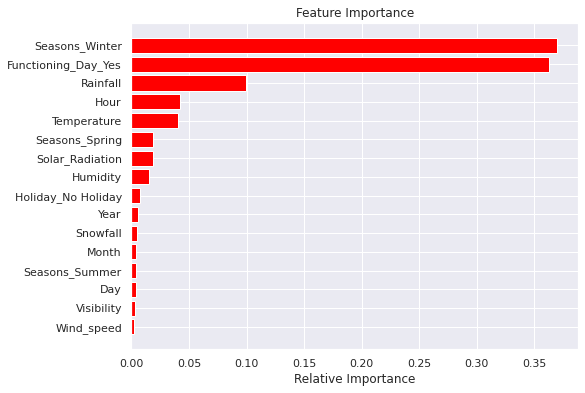

In [288]:
features = X_train.columns
importances = xg_optimal_model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Model Summary for the train data set**

In [289]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','53.20724312539368','7.29432951856397','0.6530781682549911','0.6498788891149795'])
train.add_row(['2','lasso Regression','54.89342140419932','7.409009475240217','0.642083949746934','0.6387832830010844'])
train.add_row(['3','Ridge Regression','53.20725004269553','7.294329992720066','0.6530781231528042','0.6498788435968648'])
train.add_row(['4','Decision Tree regressor','23.511410250244193','4.848856592047675','0.8467009182997819','0.8452872091890018'])
train.add_row(['5','Random forest regressor','20.958383280202117','4.578032686668163','0.8633471630761571','0.8620869640036606'])
train.add_row(['6','XGBoost','3.244161255459456','1.801155533389456','0.9788474219089348','0.9786523549063659'])
print(train)

+-------+-------------------------+--------------------+-------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME       |     Train MSE      |     Train RMSE    |     Train R^2      | Train Adjusted R^2 |
+-------+-------------------------+--------------------+-------------------+--------------------+--------------------+
|   1   |    Linear Regression    | 53.20724312539368  |  7.29432951856397 | 0.6530781682549911 | 0.6498788891149795 |
|   2   |     lasso Regression    | 54.89342140419932  | 7.409009475240217 | 0.642083949746934  | 0.6387832830010844 |
|   3   |     Ridge Regression    | 53.20725004269553  | 7.294329992720066 | 0.6530781231528042 | 0.6498788435968648 |
|   4   | Decision Tree regressor | 23.511410250244193 | 4.848856592047675 | 0.8467009182997819 | 0.8452872091890018 |
|   5   | Random forest regressor | 20.958383280202117 | 4.578032686668163 | 0.8633471630761571 | 0.8620869640036606 |
|   6   |         XGBoost         | 3.2441612554

# **Model Summary for the test data set**

In [290]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','55.198873857739045','7.42959446118959','0.6581563326914648','0.655003883886314'])
test.add_row(['2','lasso Regression', '57.596458255830626','7.5892330479324865','0.6433082210173451','0.6400188443811938'])
test.add_row(['3','Ridge Regression','55.19914200362329','7.429612506963152','0.6581546720783755','0.6550022079592136'])
test.add_row(['4','Decision Tree regressor','28.419508539823333','5.330995079703539','0.8239995068124498','0.8223764475092794'])
test.add_row(['5','Random forest regressor','25.406017155508522','5.0404381908231475','0.842661897441501','0.84121094087612'])
test.add_row(['6','XGBoost','13.813163797938946','3.7166064895195654','0.914455816943104','0.9136669368688041'])
print(test)

+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME       |      Test MSE      |     Test RMSE      |      Test R^2      | Test Adjusted R^2  |
+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |    Linear Regression    | 55.198873857739045 |  7.42959446118959  | 0.6581563326914648 | 0.655003883886314  |
|   2   |     lasso Regression    | 57.596458255830626 | 7.5892330479324865 | 0.6433082210173451 | 0.6400188443811938 |
|   3   |     Ridge Regression    | 55.19914200362329  | 7.429612506963152  | 0.6581546720783755 | 0.6550022079592136 |
|   4   | Decision Tree regressor | 28.419508539823333 | 5.330995079703539  | 0.8239995068124498 | 0.8223764475092794 |
|   5   | Random forest regressor | 25.406017155508522 | 5.0404381908231475 | 0.842661897441501  |  0.84121094087612  |
|   6   |         XGBoost         | 13.8

#**Conclusion:**

1. As it was stated in the problem, rented bike count was low in 2017 untill
november. That is when business took off and rented bike count started increasing.

2. There was sharp increase in demand from the end of 2017 that too in winter season of the year. The demand however decrease at the end of 2018.

3. Bike count rent is highly correlated with 'Hour', which seems obvious. Demand for bike is mostly in morning (7 to 8) and in the evening (3 to 9).

4. After doing exploratory data analysis, applying Linear Regression model didn't go quite well as it gave only 65% accuracy.

5. Lasso and Ridge Regression helps to reduce model complexity and prevent over-fitting which may result from simple linear regression. with Lasso, ridge  0.64, 0.65 respectively.

6. With Decision tree we reached at the model r squared value of 0.84.

7. Random forest regressor gave r squared value of 0.86 on test data.

8. XGBOOST came for the rescue to help us get best accuracy to approximate numbers of rented bikes demand. It gave amazing results of training r-square at 0.97 and test r-square value at 0.9144 also with adjusted r-square with 0.9136.